In [1]:
import numpy as np
import pandas as pd
import random as random
from collections import Counter
from math import factorial
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def coin():
    toss = []
    for i in range(0,5):  #5 coins are tossed
        s = random.randint(0,1)  #0 for head and 1 for tail
        toss.append(s)
    h = Counter(toss)
    d = dict(h)
    d1=pd.DataFrame(d.items(),columns=['Head','Frequency'])
    d1.sort_values('Head', axis=0, ascending=True)
    nd=d1.Frequency[0]
    return nd
        

In [15]:
N=100
data=[]
for i in range(N):
    dd=coin()
    data.append(dd)
cc= Counter(data)
H= dict(cc)
DF=pd.DataFrame(H.items(),columns=['Head','Frequency'])
DF

,Head,Frequency
0,2,29
1,5,7
2,4,20
3,3,39
4,1,5


In [25]:
DF.sort_values('Head',axis=0,ascending=True,inplace=True)
DF

,Head,Frequency,Cum.Freq.
4,1,5,5
0,2,29,34
3,3,39,73
2,4,20,93
1,5,7,100


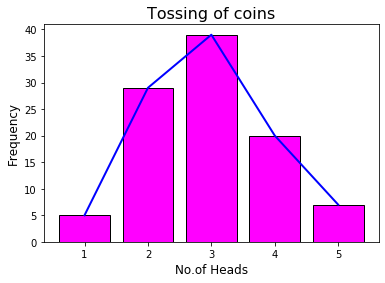

In [21]:
plt.bar(DF['Head'],DF['Frequency'],color='magenta',edgecolor='black')
plt.plot(DF['Head'],DF['Frequency'],color='blue',linewidth=2)
plt.xlabel('No.of Heads',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Tossing of coins',fontsize=16)
plt.show()

In [23]:

DF['Cum.Freq.'] = DF['Frequency'].cumsum()
DF

,Head,Frequency,Cum.Freq.
4,1,5,5
0,2,29,34
3,3,39,73
2,4,20,93
1,5,7,100


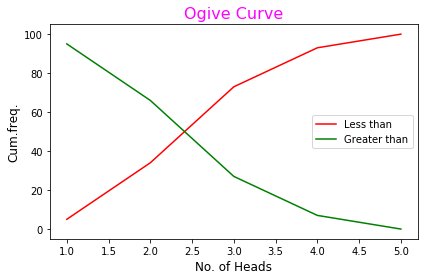

In [24]:
plt.plot(DF['Head'], DF['Cum.Freq.'], c='red',label='Less than')
plt.plot(DF['Head'], N-DF['Cum.Freq.'], c='green',label='Greater than')
plt.xlabel('No. of Heads', fontsize=12)
plt.ylabel('Cum.freq.',fontsize=12)
plt.legend()
plt.title('Ogive Curve', fontsize = 16 ,color='magenta')
plt.tight_layout() 

plt.show()

In [26]:
rdata=sorted(data)
mean=np.mean(rdata)
sd=np.sqrt(np.var(rdata))

In [27]:
print("Mean :",mean)
print("standard deviation :",sd)

Mean : 2.95
standard deviation : 0.9836157786453001


In [30]:
sk=pd.DataFrame(rdata).skew()[0]
print("skewness :",sk)

skewness : 0.22964564887279912


In [33]:
ku=pd.DataFrame(rdata).kurtosis()[0]
print("kurtosis :",ku)

kurtosis : -0.3528809582410197


In [34]:
if(sk>0):
    print('Distribution is positively tail')
elif(sk<0):
    print('Distribution is negatively tail')
elif(sk1==0):
    print('Distribution is symmetric ')

Distribution is positively tail


In [35]:
if(ku>0):
    print('Distribution is Leptokurtic')
elif(ku<0):
    print('Distribution is Platykurtic')
elif(ku==0):
    print('Distribution is Mesokurtic')

Distribution is Platykurtic


In [36]:
Q=np.percentile(rdata, [25, 50, 75])      # percentile
print('first quartiles is ',Q[0])
print('Median is ',Q[1])
print('third quartiles is ',Q[2])

first quartiles is  2.0
Median is  3.0
third quartiles is  4.0


Binomial distribution

$prob(x) = \frac{n!}{n! (n-x)!}{ p^x q^{(n-x)}}$ 

In [37]:
def binomial(x, n, p):
          
    return float(factorial(n)/(factorial(x) * factorial(n - x))) * p ** x * (1 - p)**(n - x)

In [44]:
n=max(DF['Head'])+1
ef=[]        #expected frequency
for x in range(min(DF['Head']), n):
    y =binomial(x, n, 0.5)
    ef.append(round(N*y))

In [45]:
DF['Exp.Freq.']=ef
DF

,Head,Frequency,Cum.Freq.,Exp.Freq.
4,1,5,5,9
0,2,29,34,23
3,3,39,73,31
2,4,20,93,23
1,5,7,100,9


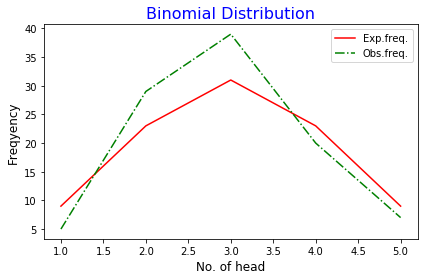

In [46]:
plt.plot(DF['Head'], ef,'r-',label='Exp.freq.')
plt.plot(DF['Head'], DF['Frequency'],'g-.', label='Obs.freq.')
plt.xlabel("No. of head", fontsize=12)
plt.ylabel("Freqyency", fontsize=12)
plt.legend()
plt.title('Binomial Distribution', fontsize = 16 ,color='blue')
plt.tight_layout() 
plt.show()

In [47]:
chi2=sum((ef-DF['Frequency'])**2/ef)  #DF['Frequency']=obs.frequency
print('chi square is ',chi2)

chi square is  6.243260090384915
